In [489]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [490]:
df=pd.read_csv("FIFA_data.csv")

In [491]:
pd.set_option('display.max_columns',20)

In [492]:
df.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

In [493]:
df.shape

(18207, 18)

In [494]:
df['Contract Valid Until']= pd.to_datetime(df["Contract Valid Until"])

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     17955 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Skill Moves               18159 non-null  float64       
 12  Position          

In [496]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

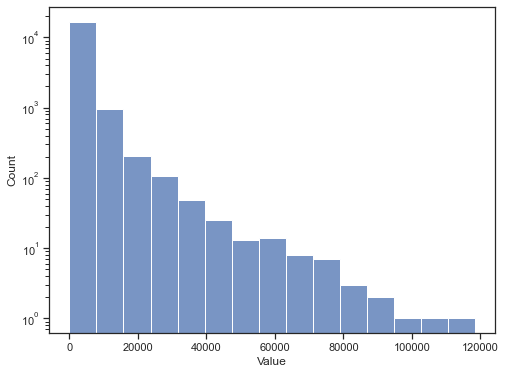

In [497]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Value'],bins=15)
plt.yscale('log')

In [498]:
df.describe()

ID           Age       Overall     Potential          Value  \
count   18207.000000  18207.000000  18207.000000  18207.000000   17955.000000   
mean   214298.338606     25.122206     66.238699     71.307299    2444.530214   
std     29965.244204      4.669943      6.908930      6.136496    5626.715434   
min        16.000000     16.000000     46.000000     48.000000      10.000000   
25%    200315.500000     21.000000     62.000000     67.000000     325.000000   
50%    221759.000000     25.000000     66.000000     71.000000     700.000000   
75%    236529.500000     28.000000     71.000000     75.000000    2100.000000   
max    246620.000000     45.000000     94.000000     95.000000  118500.000000   

               Wage  International Reputation   Skill Moves        Joined  \
count  18207.000000              18159.000000  18159.000000  18207.000000   
mean       9.731312                  1.113222      2.361308   2016.420607   
std       21.999290                  0.394031      0.756164      2.018194   
min        0.000000                  1.000000      1.000000   1991.000000   
25%        1.000000                  1.000000      2.000000   2016.000000   
50%        3.000000                  1.000000      2.000000   2017.000000   
75%        9.000000                  1.000000      3.000000   2018.000000   
max      565.000000                  5.000000      5.000000   2018.000000   

             Height        Weight  Release Clause  
count  18207.000000  18207.000000    18207.000000  
mean       5.946771    165.979129     4585.060971  
std        0.220514     15.572775    10630.414430  
min        5.083333    110.000000       13.000000  
25%        5.750000    154.000000      570.000000  
50%        5.916667    165.000000     1300.000000  
75%        6.083333    176.000000     4585.060806  
max        6.750000    243.000000   228100.000000

# Visualisations


In [499]:
# Optimal no. of bins = [log2n + 1] = log2 [(18207)+1] = 15 approx

count, bin_edges = np.histogram(df['Overall'],bins=15)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 15 bins

[  89  387  714 1189 1885 4016 3316 2645 1898 1174  575  209   68   33
    9]
[46.  49.2 52.4 55.6 58.8 62.  65.2 68.4 71.6 74.8 78.  81.2 84.4 87.6
 90.8 94. ]


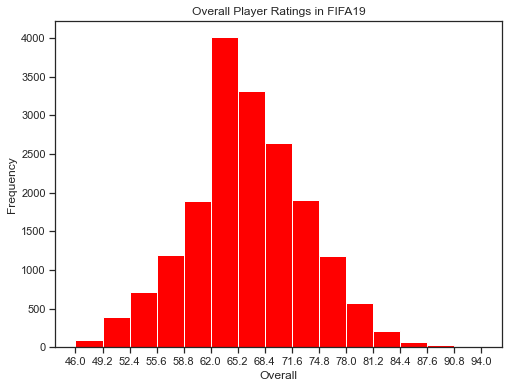

In [500]:
df['Overall'].plot(kind='hist',edgecolor = 'White' , facecolor = 'red' , bins = 15, xticks=bin_edges,figsize=(8,6))
plt.xlabel ('Overall') 
plt.ylabel ('Frequency')
plt.title ('Overall Player Ratings in FIFA19')
plt.show()

<AxesSubplot:title={'center':'Ten Most Common Countries'}, xlabel='Nationality', ylabel='Frequency'>

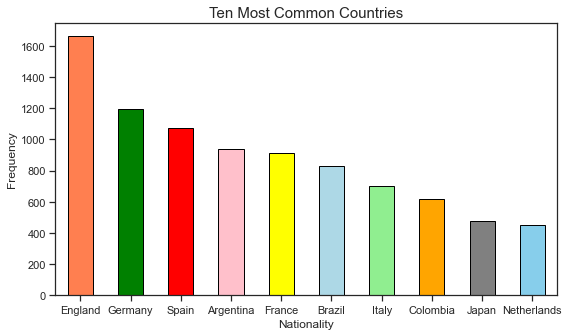

In [501]:
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.title('Ten Most Common Countries',fontsize=15)
df['Nationality'].value_counts().nlargest(10).plot(kind='bar',figsize=(9,5),color=['coral','green','red','pink','yellow','lightblue','lightgreen','orange','gray','skyblue'],rot=0,edgecolor='black')

In [573]:
Top_df=df['Nationality'].value_counts().nlargest(10)

In [574]:
Top_df=pd.DataFrame(Top_df)
Top_df.reset_index(inplace=True)

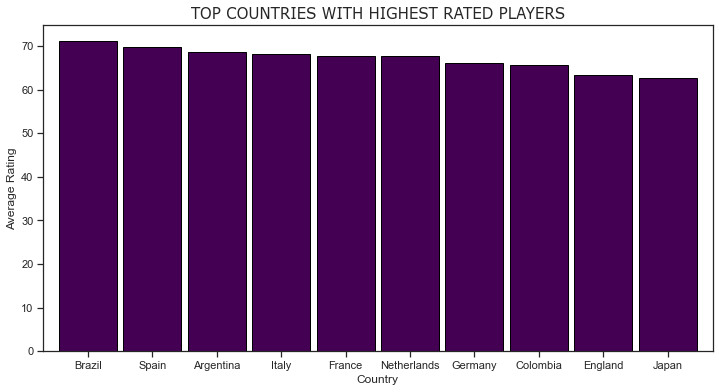

In [647]:
country_grp=df.groupby('Nationality')

# Rating of Players is normally distributed, so we can use mean as central tendency
country_grp['Overall'].mean().loc[(Top_df.loc[:,'index'])].nlargest(10).plot(kind='bar',figsize=(12,6), cmap='viridis',edgecolor='black',rot=0,width=.9)
plt.title('TOP COUNTRIES WITH HIGHEST RATED PLAYERS',fontsize=15,font='Verdana')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.show()



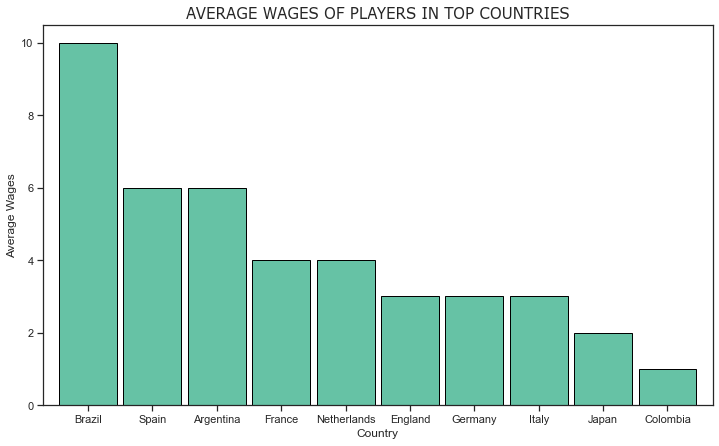

In [646]:
country_grp['Wage'].median().loc[(Top_df.loc[:,'index'])].nlargest(10).plot(kind='bar',figsize=(12,7), cmap='Set2',edgecolor='black',rot=0,width=.9)
plt.title('AVERAGE WAGES OF PLAYERS IN TOP COUNTRIES',fontsize=15,font='Verdana')
plt.xlabel('Country')
plt.ylabel('Average Wages')
plt.show()

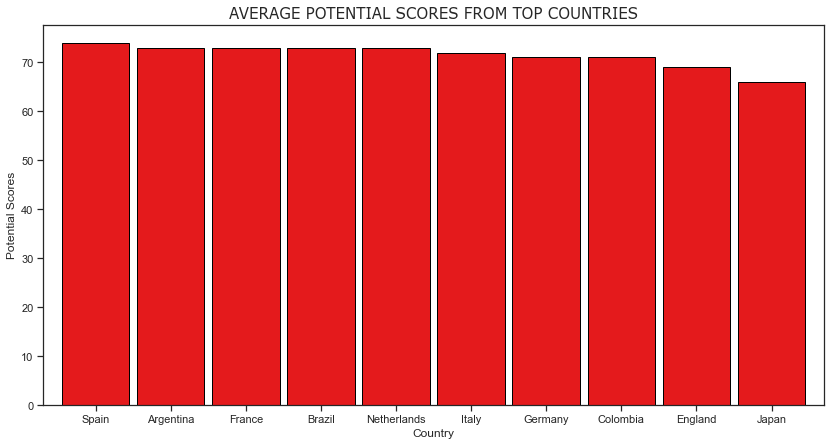

In [645]:
country_grp['Potential'].median().loc[(Top_df.loc[:,'index'])].nlargest(10).plot(kind='bar',figsize=(14,7), cmap='Set1',edgecolor='black',rot=0,width=.9)
plt.title('AVERAGE POTENTIAL SCORES FROM TOP COUNTRIES',fontsize=15,font='Verdana')
plt.xlabel('Country')
plt.ylabel('Potential Scores')
plt.show()

In [503]:
df

ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club     Value   Wage Preferred Foot  \
0             FC Barcelona  110500.0  565.0           Left   
1                 Juventus   77000.0  405.0          Right   
2      Paris Saint-Germain  118500.0  290.0          Right   
3        Manchester United   72000.0  260.0          Right   
4          Manchester City  102000.0  355.0          Right   
...                    ...       ...    ...            ...   
18202      Crewe Alexandra      60.0    1.0          Right   
18203       Trelleborgs FF      60.0    1.0          Right   
18204     Cambridge United      60.0    1.0          Right   
18205      Tranmere Rovers      60.0    1.0          Right   
18206      Tranmere Rovers      60.0    1.0          Right   

       International Reputation  Skill Moves Position  Joined  \
0                           5.0          4.0       RF    2004   
1                           5.0          5.0       ST    2018   
2                           5.0          5.0       LW    2017   
3                           4.0          1.0       GK    2011   
4                           4.0          4.0      RCM    2015   
...                         ...          ...      ...     ...   
18202                       1.0          2.0       CM    2017   
18203                       1.0          2.0       ST    2018   
18204                       1.0          2.0       ST    2017   
18205                       1.0          2.0       RW    2018   
18206                       1.0          2.0       CM    2018   

      Contract Valid Until    Height  Weight  Release Clause  
0               2021-01-01  5.583333   159.0        226500.0  
1               2022-01-01  6.166667   183.0        127100.0  
2               2022-01-01  5.750000   150.0        228100.0  
3               2020-01-01  6.333333   168.0        138600.0  
4               2023-01-01  5.916667   154.0        196400.0  
...                    ...       ...     ...             ...  
18202           2019-01-01  5.750000   134.0           143.0  
18203           2020-01-01  6.250000   170.0           113.0  
18204           2021-01-01  5.666667   148.0           165.0  
18205           2019-01-01  5.833333   154.0           143.0  
18206           2019-01-01  5.833333   176.0           165.0  

[18207 rows x 18 columns]

In [504]:
df['Preferred Foot'].value_counts(normalize=True)

Right    0.768715
Left     0.231285
Name: Preferred Foot, dtype: float64

In [505]:
df['Age'].unique()

array([31, 33, 26, 27, 32, 25, 29, 28, 24, 30, 19, 40, 22, 23, 34, 35, 36,
       37, 21, 18, 20, 39, 41, 17, 38, 45, 42, 16, 44], dtype=int64)

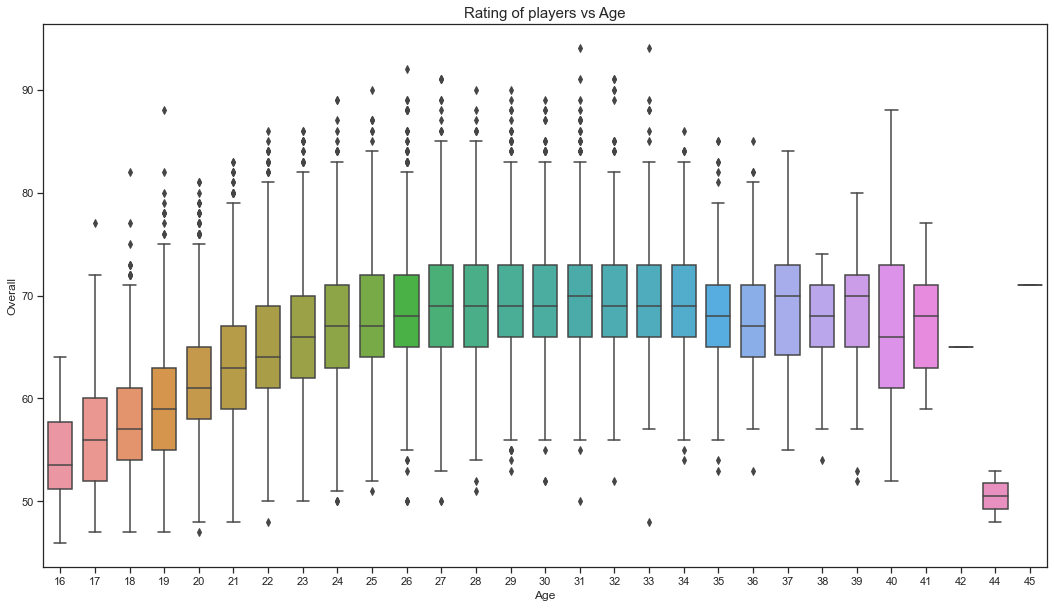

In [506]:
fig, ax= plt.subplots(figsize=(18,10))
sns.boxplot(data=df,x='Age',y='Overall',width=0.7)
plt.title("Rating of players vs Age", fontsize=15)
plt.show()


In [507]:
df

ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club     Value   Wage Preferred Foot  \
0             FC Barcelona  110500.0  565.0           Left   
1                 Juventus   77000.0  405.0          Right   
2      Paris Saint-Germain  118500.0  290.0          Right   
3        Manchester United   72000.0  260.0          Right   
4          Manchester City  102000.0  355.0          Right   
...                    ...       ...    ...            ...   
18202      Crewe Alexandra      60.0    1.0          Right   
18203       Trelleborgs FF      60.0    1.0          Right   
18204     Cambridge United      60.0    1.0          Right   
18205      Tranmere Rovers      60.0    1.0          Right   
18206      Tranmere Rovers      60.0    1.0          Right   

       International Reputation  Skill Moves Position  Joined  \
0                           5.0          4.0       RF    2004   
1                           5.0          5.0       ST    2018   
2                           5.0          5.0       LW    2017   
3                           4.0          1.0       GK    2011   
4                           4.0          4.0      RCM    2015   
...                         ...          ...      ...     ...   
18202                       1.0          2.0       CM    2017   
18203                       1.0          2.0       ST    2018   
18204                       1.0          2.0       ST    2017   
18205                       1.0          2.0       RW    2018   
18206                       1.0          2.0       CM    2018   

      Contract Valid Until    Height  Weight  Release Clause  
0               2021-01-01  5.583333   159.0        226500.0  
1               2022-01-01  6.166667   183.0        127100.0  
2               2022-01-01  5.750000   150.0        228100.0  
3               2020-01-01  6.333333   168.0        138600.0  
4               2023-01-01  5.916667   154.0        196400.0  
...                    ...       ...     ...             ...  
18202           2019-01-01  5.750000   134.0           143.0  
18203           2020-01-01  6.250000   170.0           113.0  
18204           2021-01-01  5.666667   148.0           165.0  
18205           2019-01-01  5.833333   154.0           143.0  
18206           2019-01-01  5.833333   176.0           165.0  

[18207 rows x 18 columns]

In [508]:
def Position(sp_posi):
    if sp_posi in ['RF','ST','LW','LF','RS','LS','RW','CF']:
        return 'Forward'
    
    elif sp_posi in ['RCM', 'LCM' ,'CDM','CAM','LDM','RAM','CM' ,'LAM','LM' ,'RM','RDM']:
        return 'Middle'
    
    elif sp_posi in ['RCB', 'CB', 'LCB','LB','RB','RWB','LWB']:
        return 'Defense'
    
    else:
        return 'Goal Keeper'


df['Common Positions'] = df['Position'].apply(Position)

In [509]:
df['Common Positions'].value_counts()

Middle         6843
Defense        5917
Forward        3420
Goal Keeper    2027
Name: Common Positions, dtype: int64

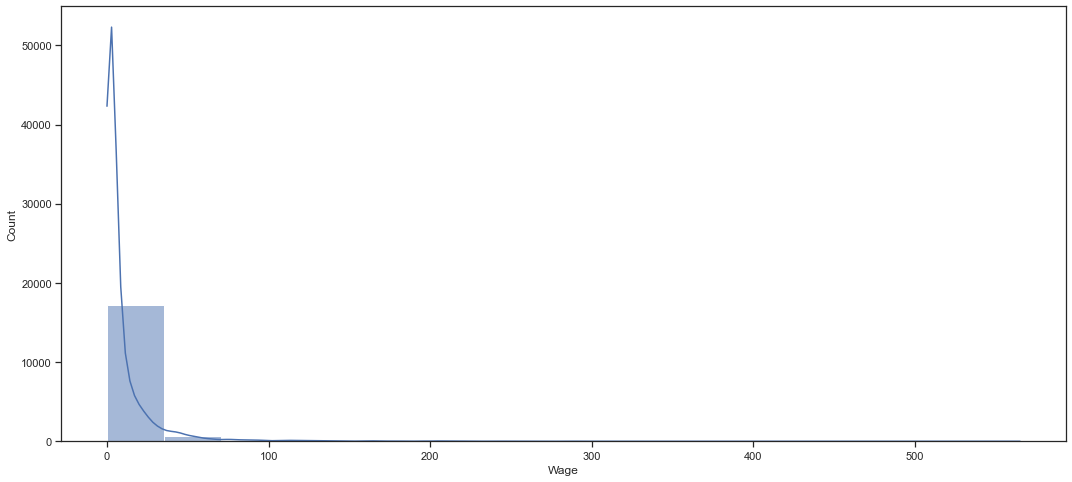

In [510]:
fig= plt.figure(figsize=(18,8))
sns.histplot(df['Wage'],bins=16,kde=True)

plt.show()


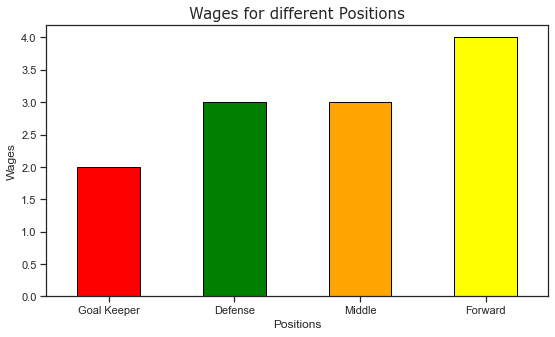

In [511]:
position_grp=df.groupby('Common Positions')


position_grp['Wage'].median().sort_values().plot(kind='bar',figsize=(9,5),color=['red','green','orange','yellow'],edgecolor='black',rot=0)
plt.title('Wages for different Positions',fontsize=15,font='Verdana')
plt.xlabel('Positions',fontsize=12)
plt.ylabel('Wages',fontsize=12)
plt.show()


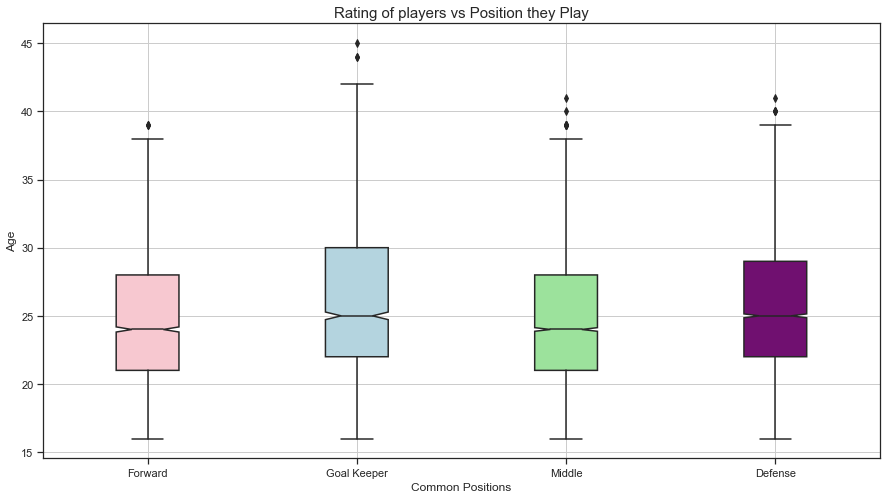

In [512]:
fig, ax= plt.subplots(figsize=(15,8))
box_colors=['pink', 'lightblue', 'lightgreen', 'purple']
sns.boxplot(data=df,x='Common Positions',y='Age',width=0.3,palette=box_colors ,notch=True)
plt.title("Rating of players vs Position they Play", fontsize=15)
plt.grid()
plt.show()


In [513]:
df

ID                Name  Age Nationality  Overall  Potential  \
0      158023            L. Messi   31   Argentina       94         94   
1       20801   Cristiano Ronaldo   33    Portugal       94         94   
2      190871           Neymar Jr   26      Brazil       92         93   
3      193080              De Gea   27       Spain       91         93   
4      192985        K. De Bruyne   27     Belgium       91         92   
...       ...                 ...  ...         ...      ...        ...   
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                      Club     Value   Wage Preferred Foot  \
0             FC Barcelona  110500.0  565.0           Left   
1                 Juventus   77000.0  405.0          Right   
2      Paris Saint-Germain  118500.0  290.0          Right   
3        Manchester United   72000.0  260.0          Right   
4          Manchester City  102000.0  355.0          Right   
...                    ...       ...    ...            ...   
18202      Crewe Alexandra      60.0    1.0          Right   
18203       Trelleborgs FF      60.0    1.0          Right   
18204     Cambridge United      60.0    1.0          Right   
18205      Tranmere Rovers      60.0    1.0          Right   
18206      Tranmere Rovers      60.0    1.0          Right   

       International Reputation  Skill Moves Position  Joined  \
0                           5.0          4.0       RF    2004   
1                           5.0          5.0       ST    2018   
2                           5.0          5.0       LW    2017   
3                           4.0          1.0       GK    2011   
4                           4.0          4.0      RCM    2015   
...                         ...          ...      ...     ...   
18202                       1.0          2.0       CM    2017   
18203                       1.0          2.0       ST    2018   
18204                       1.0          2.0       ST    2017   
18205                       1.0          2.0       RW    2018   
18206                       1.0          2.0       CM    2018   

      Contract Valid Until    Height  Weight  Release Clause Common Positions  
0               2021-01-01  5.583333   159.0        226500.0          Forward  
1               2022-01-01  6.166667   183.0        127100.0          Forward  
2               2022-01-01  5.750000   150.0        228100.0          Forward  
3               2020-01-01  6.333333   168.0        138600.0      Goal Keeper  
4               2023-01-01  5.916667   154.0        196400.0           Middle  
...                    ...       ...     ...             ...              ...  
18202           2019-01-01  5.750000   134.0           143.0           Middle  
18203           2020-01-01  6.250000   170.0           113.0          Forward  
18204           2021-01-01  5.666667   148.0           165.0          Forward  
18205           2019-01-01  5.833333   154.0           143.0          Forward  
18206           2019-01-01  5.833333   176.0           165.0           Middle  

[18207 rows x 19 columns]

In [514]:
""""
fig =plt.figure(figsize=(20,12))
sns.lineplot(data=df,x='Age',y='Overall',hue='Common Positions',ci=None)
plt.grid()
plt.xlabel('Age',fontsize=16)
plt.ylabel('Performance',fontsize=16)
plt.legend(fontsize='large')
plt.show()
"""

'"\nfig =plt.figure(figsize=(20,12))\nsns.lineplot(data=df,x=\'Age\',y=\'Overall\',hue=\'Common Positions\',ci=None)\nplt.grid()\nplt.xlabel(\'Age\',fontsize=16)\nplt.ylabel(\'Performance\',fontsize=16)\nplt.legend(fontsize=\'large\')\nplt.show()\n'

In [515]:
for_df=df[df['Common Positions']=='Forward']
def_df=df[df['Common Positions']=='Defense']
mid_df=df[df['Common Positions']=='Middle']
goal_df=df[df['Common Positions']=='Goal Keeper']

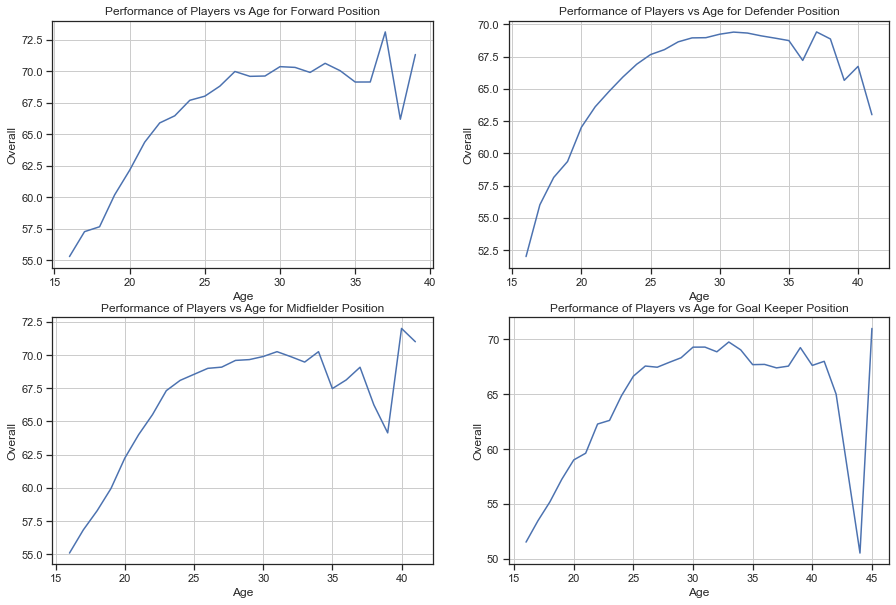

In [516]:
#fig = plt.figure(figsize=(12,8)) # create figure
fig = plt.figure(figsize=(15, 10))

# Create subplots
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.set(style="ticks")
sns.lineplot(data=for_df,x='Age',y='Overall',ci=None,ax=ax1)
ax1.set_title('Performance of Players vs Age for Forward Position')
ax1.grid()

sns.set(style="ticks")
sns.lineplot(data=def_df,x='Age',y='Overall',ci=None,ax=ax2)
ax2.set_title('Performance of Players vs Age for Defender Position')
ax2.grid()

sns.set(style="ticks")
sns.lineplot(data=mid_df,x='Age',y='Overall',ci=None,ax=ax3)
ax3.set_title('Performance of Players vs Age for Midfielder Position')
ax3.grid()

sns.set(style="ticks")
sns.lineplot(data=goal_df,x='Age',y='Overall',ci=None,ax=ax4)
ax4.set_title('Performance of Players vs Age for Goal Keeper Position')
ax4.grid()



plt.show()